In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from tiled.client import from_uri

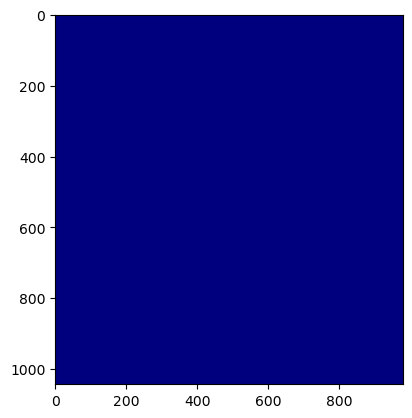

In [ ]:
data = tifffile.imread('/nsls2/data/staff/xyang4/data_cs/ca_beamtime_20251030/raw/XY_s4_1Dscan_run3_th0.100_x1.000_phi90.000_1.00s_2184676_000007_waxs.tiff')
plt.imshow(data, cmap='jet')
plt.show()

In [2]:
from tiled.client import from_uri
client = from_uri("https://tiled.nsls2.bnl.gov")
c = client['cms']['raw']


In [4]:
h = c[2184676]

TypeError: Containers can only be indexed by strings

In [10]:
from pathlib import Path
import re

def load_sorted_tiffs(directory: str | Path):
    dir_path = Path(directory)
    print(f"Loading TIFF files from: {dir_path}")

    def _suffix_key(path: Path):
        matches = re.findall(r"\d+", path.stem)
        return (1, path.name) if not matches else (0, int(matches[-1]))

    tiff_paths = sorted(dir_path.glob("*.tif*"), key=_suffix_key)
    print(f"Found {len(tiff_paths)} TIFF files.")
    if not tiff_paths:
        raise FileNotFoundError(f"No TIFF files found in {dir_path}")

    arrays = [tifffile.imread(path) for path in tiff_paths]
    return tiff_paths, np.stack(arrays)

# Example usage:
tiff_files, data_stack = load_sorted_tiffs("/nsls2/data/staff/xyang4/data_cs/ca_beamtime_20251030/raw")

Loading TIFF files from: /nsls2/data/staff/xyang4/data_cs/ca_beamtime_20251030/raw
Found 1617 TIFF files.


In [11]:
print(data_stack.shape)  # Print the shape of the stacked array 

(1617, 1043, 981)


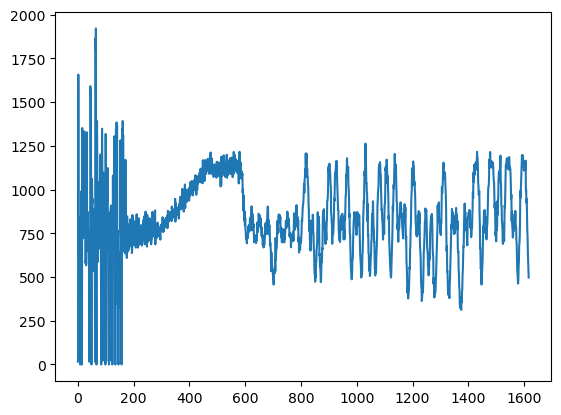

In [12]:
plt.plot(data_stack[:, 540, 474])
plt.show()